In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings("ignore")


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
def csv_to_parquet(csv_path, save_name):
  df = pd.read_csv(csv_path)
  df.to_parquet(f"./{save_name}.parquet")
  del df
  gc.collect()
  print(save_name, "Done")

In [ ]:
csv_to_parquet('/content/drive/MyDrive/DACON/제주도 도로 교통량 예측 AI 경진대회/train.csv', 'train')
csv_to_parquet('/content/drive/MyDrive/DACON/제주도 도로 교통량 예측 AI 경진대회/test.csv', 'test')

train Done
test Done


In [ ]:
data_info = pd.read_csv("/content/drive/MyDrive/DACON/제주도 도로 교통량 예측 AI 경진대회/data_info.csv")
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [ ]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

In [ ]:
train.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target'],
      dtype='object')

In [ ]:
train.isna().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [ ]:
test.isna().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [ ]:
train.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


### lane_count 차로수

In [ ]:
train["lane_count"].value_counts()

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64

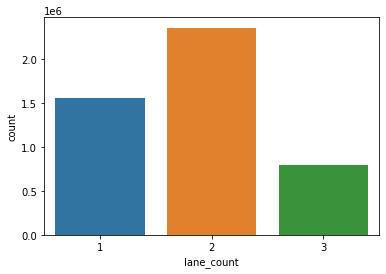

In [ ]:
sns.countplot(train["lane_count"])
plt.show()

In [ ]:
test["lane_count"].value_counts()

2    126893
3     85286
1     79062
Name: lane_count, dtype: int64

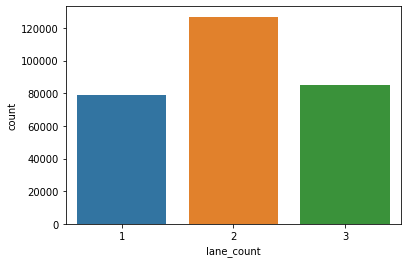

In [ ]:
sns.countplot(test["lane_count"])
plt.show()

### road_rating 도로등급

In [ ]:
train["road_rating"].value_counts()

NameError: ignored

In [ ]:
sns.countplot(train["road_rating"])
plt.show()

In [ ]:
test["road_rating"].value_counts()

In [ ]:
sns.countplot(test["road_rating"])
plt.show()

### multi_linked 중용구간 여부

In [ ]:
train["multi_linked"].value_counts()

0    4698978
1       2239
Name: multi_linked, dtype: int64

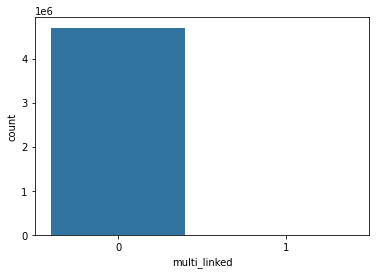

In [ ]:
sns.countplot(train["multi_linked"])
plt.show()

In [ ]:
test["multi_linked"].value_counts()

0    291241
Name: multi_linked, dtype: int64

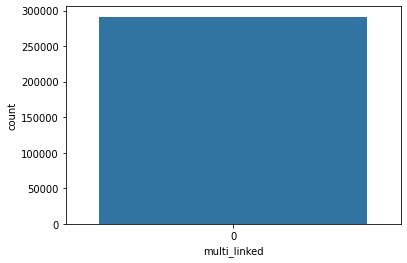

In [ ]:
sns.countplot(test["multi_linked"])
plt.show()

테스트 데이터셋의 multi_linked는 0으로만 이루워져 있어 드랍할듯

### connect_code 연결로 코드

In [ ]:
train["connect_code"].value_counts()

0      4689075
103      12142
Name: connect_code, dtype: int64

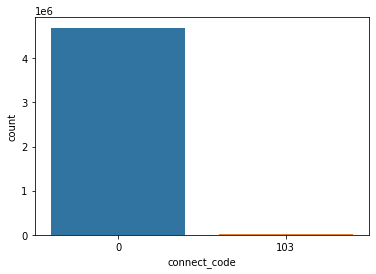

In [ ]:
sns.countplot(train["connect_code"])
plt.show()

In [ ]:
test["connect_code"].value_counts()

0    291241
Name: connect_code, dtype: int64

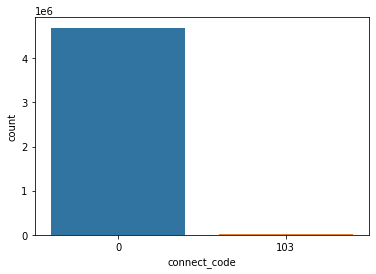

In [ ]:
sns.countplot(train["connect_code"])
plt.show()

테스트 데이터셋의 connect_code는 0으로만 이루워져 있어 드랍할듯

### maximum_speed_limit 최고속도제한

In [ ]:
train["maximum_speed_limit"].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

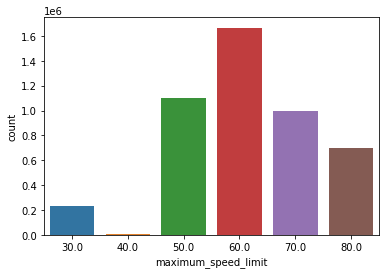

In [ ]:
sns.countplot(train["maximum_speed_limit"])
plt.show()

In [ ]:
test["maximum_speed_limit"].value_counts()

60.0    108606
70.0     80356
50.0     71315
30.0     21350
80.0      9614
Name: maximum_speed_limit, dtype: int64

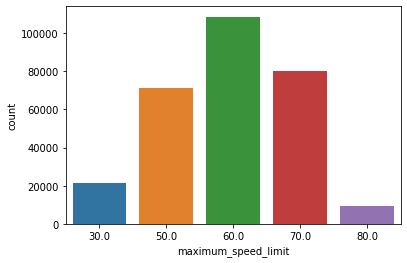

In [ ]:
sns.countplot(test["maximum_speed_limit"])
plt.show()

### weight_restricted 통과제한하중

In [ ]:
train["weight_restricted"].value_counts()

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64

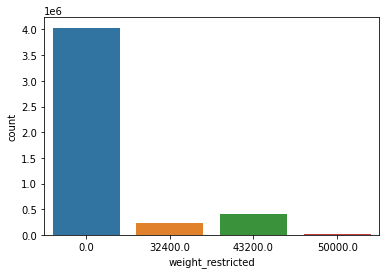

In [ ]:
sns.countplot(train["weight_restricted"])
plt.show()

In [ ]:
test["weight_restricted"].value_counts()

0.0        263267
43200.0     14527
32400.0     13428
50000.0        19
Name: weight_restricted, dtype: int64

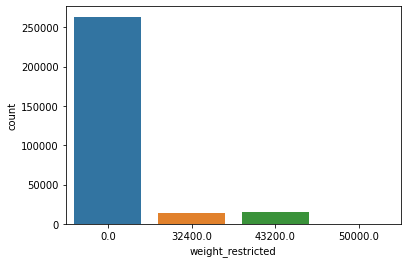

In [ ]:
sns.countplot(test["weight_restricted"])
plt.show()

### height_restricted 통과제한높이

In [ ]:
train["height_restricted"].value_counts()

0.0    4701217
Name: height_restricted, dtype: int64

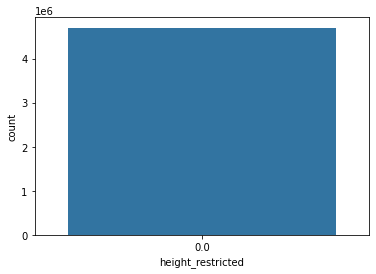

In [ ]:
sns.countplot(train["height_restricted"])
plt.show()

In [ ]:
test["height_restricted"].value_counts()

0.0    291241
Name: height_restricted, dtype: int64

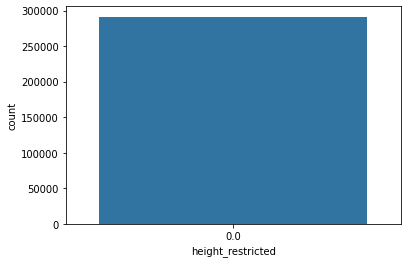

In [ ]:
sns.countplot(test["height_restricted"])
plt.show()

train, test 모두 존재하지 않음. Drop 예정

### road_type 도로유형

In [ ]:
train["road_type"].value_counts()

0    3737117
3     964100
Name: road_type, dtype: int64

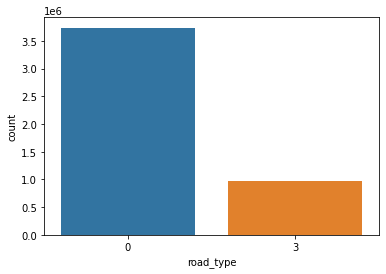

In [ ]:
sns.countplot(train["road_type"])
plt.show()

In [ ]:
test["road_type"].value_counts()

0    229610
3     61631
Name: road_type, dtype: int64

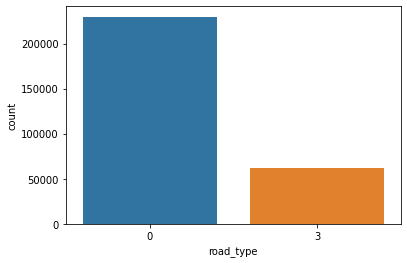

In [ ]:
sns.countplot(test["road_type"])
plt.show()

### start_turn_restricted

In [ ]:
train["start_turn_restricted"].value_counts()

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64

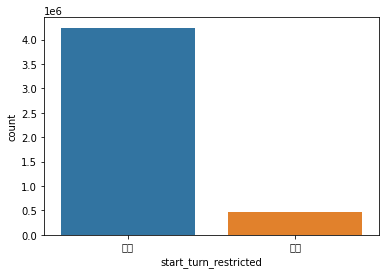

In [ ]:
sns.countplot(train["start_turn_restricted"])
plt.show()

In [ ]:
test["start_turn_restricted"].value_counts()

없음    246968
있음     44273
Name: start_turn_restricted, dtype: int64

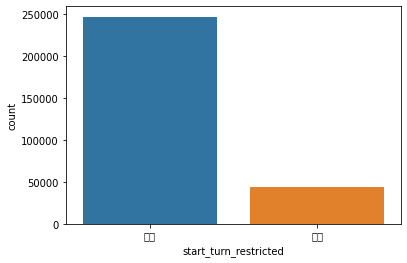

In [ ]:
sns.countplot(test["start_turn_restricted"])
plt.show()

### end_turn_restricted 도착지점의 회전제한 유무

In [ ]:
train["end_turn_restricted"].value_counts()

없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64

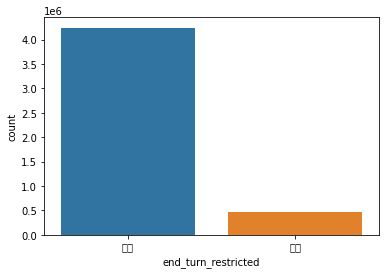

In [ ]:
sns.countplot(train["end_turn_restricted"])
plt.show()

In [ ]:
test["end_turn_restricted"].value_counts()

없음    246953
있음     44288
Name: end_turn_restricted, dtype: int64

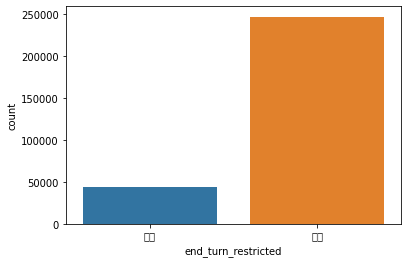

In [ ]:
sns.countplot(test["end_turn_restricted"])
plt.show()

### vehicle_restricted 통과제한차량

In [ ]:
train["vehicle_restricted"].value_counts()

0.0    4701217
Name: vehicle_restricted, dtype: int64

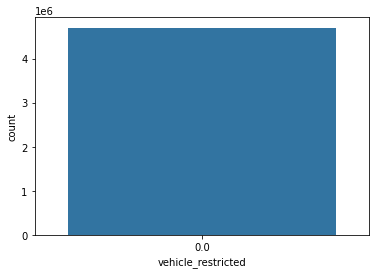

In [ ]:
sns.countplot(train["vehicle_restricted"])
plt.show()

In [ ]:
test["vehicle_restricted"].value_counts()

0.0    291241
Name: vehicle_restricted, dtype: int64

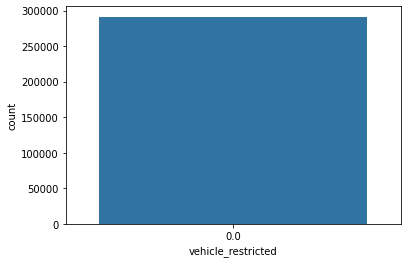

In [ ]:
sns.countplot(test["vehicle_restricted"])
plt.show()

모드 0이라 드랍 예정

### target 평균속도(km)

In [ ]:
train["target"].value_counts()

NameError: ignored

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
sns.countplot(train["target"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.boxplot(data=train['target'])

In [ ]:
days = ["월", "화", "수", "목", "금", "토", "일"]

for day in days:
  print("<" + day + "요일>")
  print("average speed: ", train[train["day_of_week"]==day].target.mean())
  print("maximum speed: ", train[train["day_of_week"]==day].target.max())
  print("minimum speed: ", train[train["day_of_week"]==day].target.min())
  print("-------------------------------------")

In [ ]:
from matplotlib.pyplot import figure

eng_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(18,8))
plt.subplots(2,4,figsize=(18,8))

n = 0

for i, day in enumerate(days):
  n += 1
  plt.subplot(2,4,n)
  sns.countplot(train[train["day_of_week"]==day]["target"])
  plt.title(eng_days[i])
  plt.tight_layout()

### base_hour 시간대

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [ ]:
times = [i for i in range(0,24)]
print(times)

for time in times:
  print("<" + str(time) + "시>")
  print("average speed: ", train[train["base_hour"]==time].target.mean())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
<0시>
average speed:  48.74219956148886
<1시>
average speed:  49.76329975377427
<2시>
average speed:  50.27865841414583
<3시>
average speed:  50.54325437032667
<4시>
average speed:  49.747525471309984
<5시>
average speed:  47.20113952563933
<6시>
average speed:  45.549029131339154
<7시>
average speed:  43.682268249431075
<8시>
average speed:  41.65629226006192
<9시>
average speed:  40.87593935527232
<10시>
average speed:  40.22223191608988
<11시>
average speed:  39.82459295494329
<12시>
average speed:  39.83853790485902
<13시>
average speed:  39.73147080920405
<14시>
average speed:  39.561120915856606
<15시>
average speed:  39.35169967512037
<16시>
average speed:  39.127929181460516
<17시>
average speed:  38.47336318307683
<18시>
average speed:  38.2412578313253
<19시>
average speed:  40.10411206937628
<20시>
average speed:  41.11380627039048
<21시>
average speed:  42.17343124493455
<22시>
average speed:  43.98986188437364

낮시간보다 밤에 평균 속도가 더 빠른 것을 알 수 있음

<Figure size 1296x576 with 0 Axes>

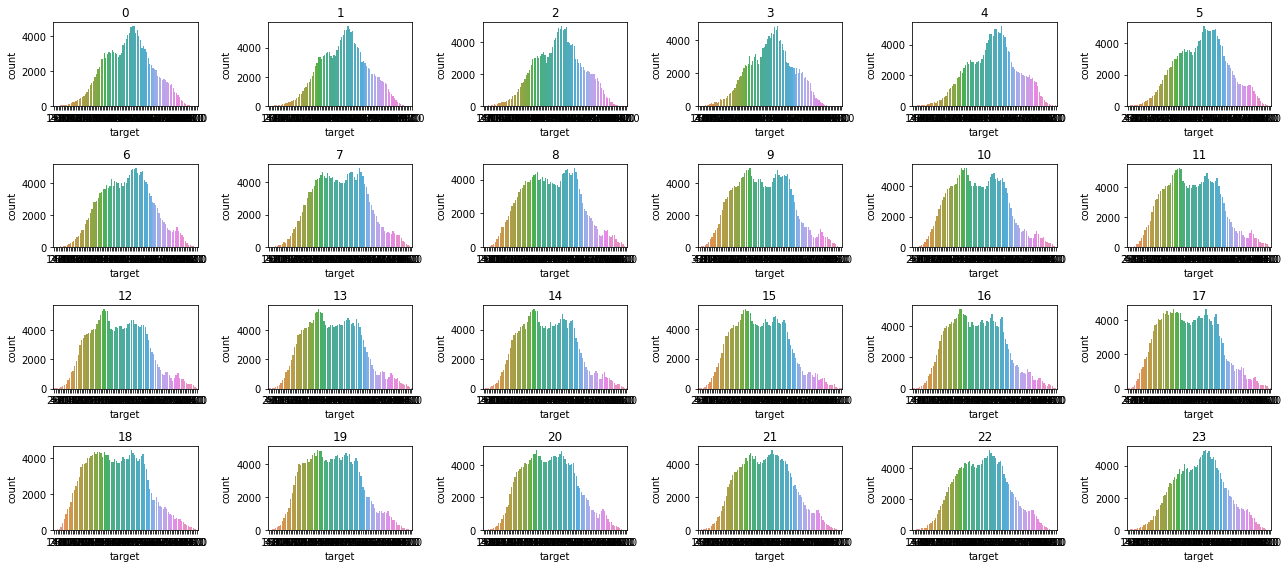

In [ ]:
plt.figure(figsize=(18,8))
plt.subplots(2,7,figsize=(18,8))

i = 0

for time in times:
  i += 1
  plt.subplot(4,6,i)
  sns.countplot(train[train["base_hour"]==time]["target"])
  plt.title(time)
  plt.tight_layout()

### 달별 비교 Month

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [ ]:
def base_date_to_month(date):
  return int(str(date)[4:6])

train["month"] = [base_date_to_month(x) for x in train["base_date"]]
test["month"] = [base_date_to_month(x) for x in test["base_date"]]

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,6
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,7
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,10
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,3
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,10


In [ ]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,8
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,8
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음,8
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음,8
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음,8


In [ ]:
test.month.value_counts()

8    291241
Name: month, dtype: int64

테스트 데이터는 모두 8월의 값.

월별 차이가 확실하거나 시계열적 요소가 있다면 일부분의 데이터만 사용하여 training 시키는게 더 효과적일수도

In [ ]:
train["month"].value_counts()

12    616511
9     570909
1     569884
2     550807
10    537916
3     505671
6     490137
5     463709
7     274695
11    120978
Name: month, dtype: int64

In [ ]:
months = [i for i in range(1,13)]
print(months)

for month in months:
  print("<" + str(month) + "월>")
  print("average speed: ", train[train["month"]==month].target.mean())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
<1월>
average speed:  43.03312954917141
<2월>
average speed:  43.25618229252715
<3월>
average speed:  43.548672951385385
<4월>
average speed:  nan
<5월>
average speed:  42.63932768180044
<6월>
average speed:  42.61415685818455
<7월>
average speed:  36.282302189701305
<8월>
average speed:  nan
<9월>
average speed:  43.69434007871657
<10월>
average speed:  43.49571680336707
<11월>
average speed:  43.72821504736398
<12월>
average speed:  43.03002055113372


<Figure size 1296x576 with 0 Axes>

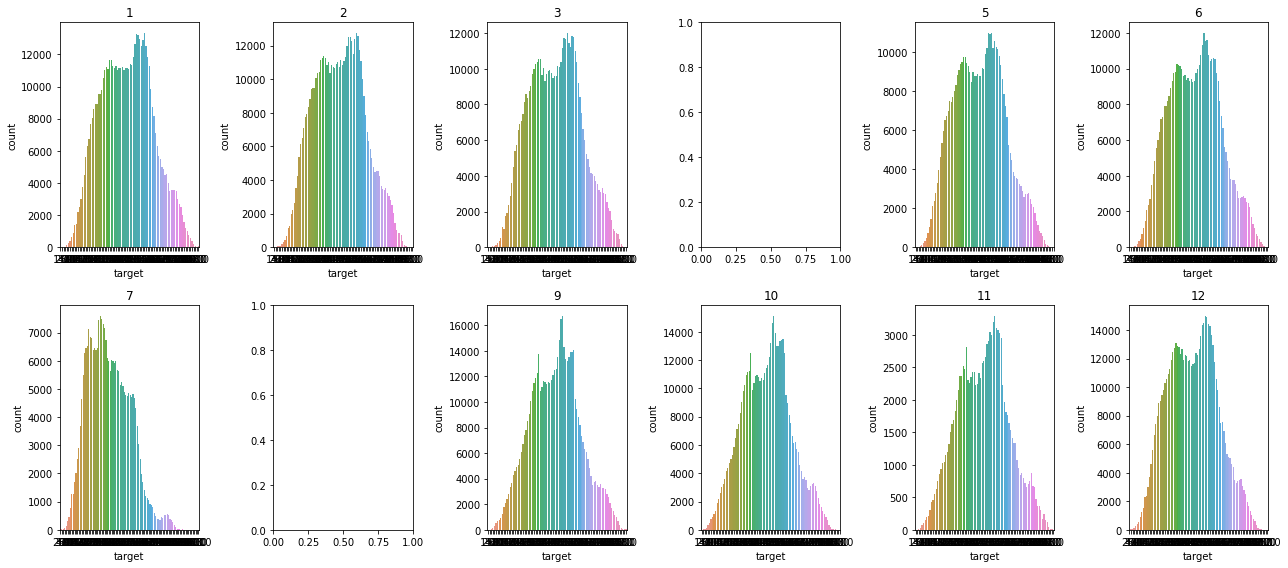

In [ ]:
plt.figure(figsize=(18,8))
plt.subplots(2, 6,figsize=(18,8))

i = 0

for month in months:
  i += 1
  plt.subplot(2,6,i)
  try:
    sns.countplot(train[train["month"]==month]["target"])
    plt.title(month)
    plt.tight_layout()
  except:
    pass

7월달의 분포만 다른 달과 다르게 나타남.

추가적인 조사 필요

### 연별 비교 year

In [ ]:
def base_date_to_year(date):
  return int(str(date)[0:4])

train["year"] = [base_date_to_year(x) for x in train["base_date"]]
test["year"] = [base_date_to_year(x) for x in test["base_date"]]

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month,year
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,6,2022
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,7,2022
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,10,2021
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,3,2022
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,10,2021


In [ ]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month,year
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,8,2022
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,8,2022
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음,8,2022
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음,8,2022
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음,8,2022


In [ ]:
train.year.value_counts()

2022    2854903
2021    1846314
Name: year, dtype: int64

In [ ]:
test.year.value_counts()

2022    291241
Name: year, dtype: int64

In [ ]:
years = [2021, 2022]
print(years)

for year in years:
  print("<" + str(year) + "년>")
  print("average speed: ", train[train["year"]==year].target.mean())
  print("maximum speed: ", train[train["year"]==year].target.max())
  print("minimum speed: ", train[train["year"]==year].target.min())

[2021, 2022]
<2021년>
average speed:  43.41686571189949
maximum speed:  112.0
minimum speed:  1.0
<2022년>
average speed:  42.38202944198104
maximum speed:  113.0
minimum speed:  1.0


<Figure size 1296x576 with 0 Axes>

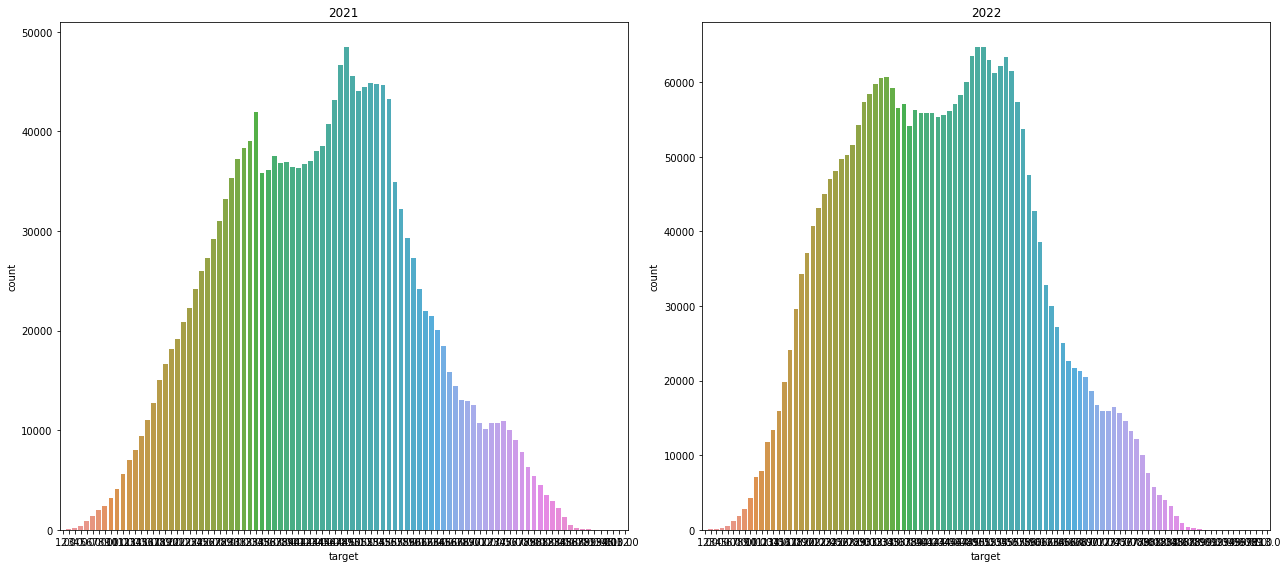

In [ ]:
plt.figure(figsize=(18,8))
plt.subplots(1, 2,figsize=(18,8))

i = 0

for year in years:
  i += 1
  plt.subplot(1,2,i)
  try:
    sns.countplot(train[train["year"]==year]["target"])
    plt.title(year)
    plt.tight_layout()
  except:
    pass

### Correlation heatmap

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month,year
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,6,2022
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,7,2022
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,10,2021
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,3,2022
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,10,2021


In [ ]:
train.columns

Index(['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count',
       'road_rating', 'road_name', 'multi_linked', 'connect_code',
       'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted',
       'height_restricted', 'road_type', 'start_node_name', 'start_latitude',
       'start_longitude', 'start_turn_restricted', 'end_node_name',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target',
       'month', 'year'],
      dtype='object')

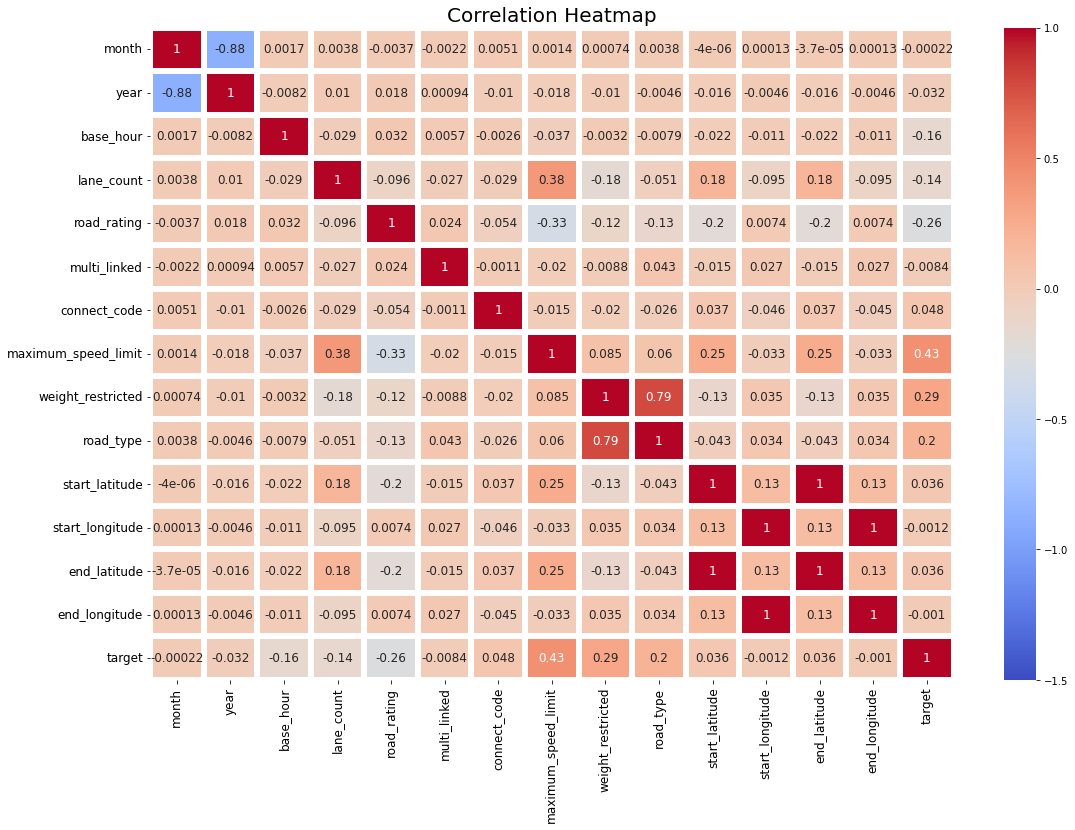

In [ ]:
corr = train[["month", "year", "base_hour", "lane_count", "road_rating", "multi_linked", "connect_code", 'maximum_speed_limit',
       'weight_restricted', 'road_type', 'start_node_name', 'start_latitude', 'start_longitude',
       'end_latitude', 'end_longitude', 'end_turn_restricted', 'target']].corr()
plt.figure(figsize=(18,12))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Correlation Heatmap", fontsize=20)
sns.heatmap(corr, cmap="coolwarm", annot=True, annot_kws={"size":12}, linewidths=5, vmin=-1.5)

### road_name 도로명

In [ ]:
len(train.road_name.unique())

61

In [ ]:
train.road_name.unique()

array(['지방도1112호선', '일반국도11호선', '일반국도16호선', '태평로', '일반국도12호선', '경찰로', '-',
       '외도천교', '일반국도99호선', '중정로', '번영로', '연동로', '중산간서로', '지방도1118호선',
       '새서귀로', '지방도1115호선', '지방도1132호선', '어시천교', '지방도1120호선', '삼무로',
       '애조로', '지방도1116호선', '일반국도95호선', '동부관광도로', '동홍로', '지방도97호선', '중문로',
       '연삼로', '중앙로', '산서로', '지방도1117호선', '연북로', '남조로', '지방도1119호선', '동문로',
       '한천로', '삼봉로', '고평교', '연북2교', '관광단지로', '권학로', '시청로', '신대로', '서사로',
       '관덕로', '관광단지1로', '신산로', '관광단지2로', '신광로', '지방도1136호선', '첨단로',
       '제2거로교', '시민광장로', '임항로', '수영장길', '애원로', '삼성로', '일주동로', '호서중앙로',
       '아봉로', '호근로'], dtype=object)

In [ ]:
test.road_name.unique()

array(['연삼로', '일반국도12호선', '일반국도16호선', '일반국도11호선', '번영로', '수영장길', '-',
       '지방도1136호선', '제2거로교', '일반국도99호선', '경찰로', '시청로', '서사로', '관광단지1로',
       '신산로', '새서귀로', '중문로', '지방도1132호선', '태평로', '산서로', '관광단지로', '중정로',
       '관광단지2로', '동홍로', '고평교', '애조로', '삼봉로', '외도천교', '권학로', '신대로', '삼성로',
       '지방도1118호선', '시민광장로', '지방도1115호선', '중앙로', '첨단로', '관덕로', '어시천교',
       '한천로', '동부관광도로', '연북2교', '동문로', '연북로', '연동로', '지방도1117호선',
       '지방도97호선'], dtype=object)

In [ ]:
train.road_name.value_counts()

일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: road_name, Length: 61, dtype: int64

In [ ]:
test.road_name.value_counts()

일반국도12호선     50140
일반국도16호선     42961
지방도1132호선    20585
일반국도11호선     16145
태평로          15554
-            12600
경찰로          10045
새서귀로         10038
동홍로           9688
번영로           8876
지방도1115호선     8529
연삼로           7395
중문로           7045
일반국도99호선      5587
권학로           5264
시민광장로         4576
시청로           4518
산서로           4277
중정로           4119
서사로           2864
지방도1118호선     2856
중앙로           2853
관광단지로         2817
제2거로교         1480
첨단로           1478
애조로           1477
연북2교          1473
동부관광도로        1473
연동로           1471
연북로           1469
고평교           1468
한천로           1464
신대로           1463
관덕로           1454
지방도1136호선     1454
어시천교          1445
외도천교          1445
삼성로           1435
신산로           1420
삼봉로           1357
관광단지1로        1348
동문로           1330
수영장길          1327
관광단지2로        1319
지방도1117호선     1104
지방도97호선        755
Name: road_name, dtype: int64

In [ ]:
road_names = train.road_name.unique()

target_data = []

for road_name in road_names:
  print(road_name + ": ", train[train["road_name"]==road_name].target.mean())
  target_data.append(train[train["road_name"]==road_name].target.mean())

data = {"road_name": road_names,
        "avg_target":target_data}

avg_target = pd.DataFrame(data)

지방도1112호선:  47.29190913520321
일반국도11호선:  39.99015767196258
일반국도16호선:  44.36514580440389
태평로:  25.03000379500763
일반국도12호선:  43.53097911082391
경찰로:  24.686785040249585
-:  44.7745560291011
외도천교:  40.872412336290665
일반국도99호선:  42.96566223689442
중정로:  25.31128519453276
번영로:  50.719691899070384
연동로:  22.564200398142003
중산간서로:  51.035885500150044
지방도1118호선:  50.635763382138315
새서귀로:  26.9149110877319
지방도1115호선:  53.75629606442617
지방도1132호선:  40.370719866071425
어시천교:  40.87258132657372
지방도1120호선:  36.228093113879915
삼무로:  15.159958623283806
애조로:  57.21278531260337
지방도1116호선:  61.58072063640618
일반국도95호선:  70.44343845822202
동부관광도로:  36.893482772934824
동홍로:  29.91213485445337
지방도97호선:  60.52572257876038
중문로:  36.008324643726105
연삼로:  35.05394631942599
중앙로:  25.34925819309123
산서로:  30.474955304384714
지방도1117호선:  58.903307594790824
연북로:  23.67998015380799
남조로:  34.09804784969911
지방도1119호선:  41.875177765025825
동문로:  23.898236348203337
한천로:  22.74526016871294
삼봉로:  17.02491103202847
고평교:  36.1268619

In [ ]:
avg_target

,road_name,avg_target
0,지방도1112호선,47.291909
1,일반국도11호선,39.990158
2,일반국도16호선,44.365146
3,태평로,25.030004
4,일반국도12호선,43.530979
...,...,...
56,삼성로,30.794918
57,일주동로,51.258383
58,호서중앙로,32.510819
59,아봉로,32.254154


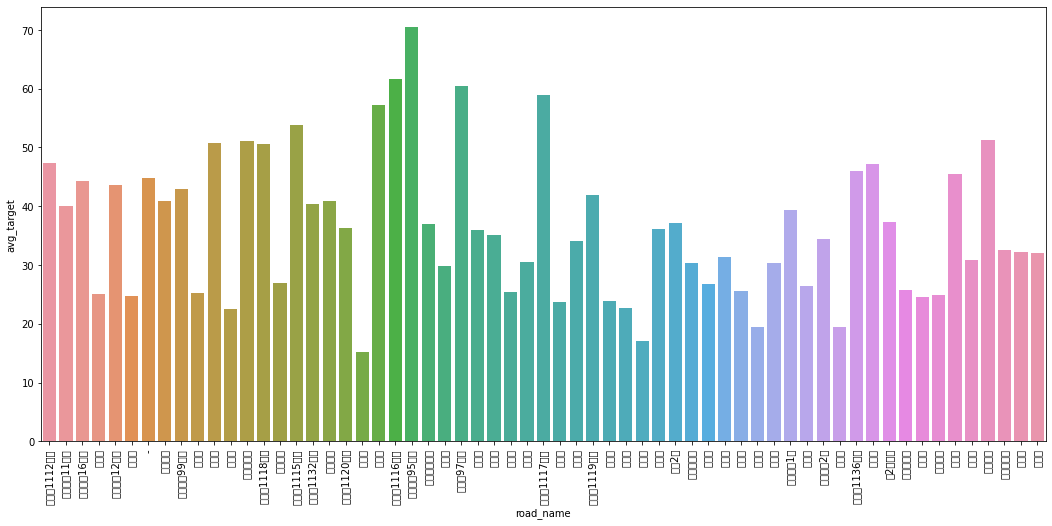

In [ ]:
plt.figure(figsize=(18,8))

sns.barplot(x = 'road_name',
            y = 'avg_target',
            data = avg_target)
plt.xticks(rotation=90)
plt.show()

도로명 별로 평균 속도의 차이가 많이 나는 것을 알 수 있다.